# Chronical Kidney Disease

In [21]:
#execute hedhi 9bal !
pip install arff

  Using cached arff-0.9.tar.gz (4.7 kB)
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4970 sha256=5a02bb28e7f3c00a0042d3e9a36dc0cfd56bd20998ec144785e891b994680020
  Stored in directory: c:\users\rouka\appdata\local\pip\cache\wheels\8b\5b\6a\fdaf9e4b202a61789ddbc0341e3a0df5406d8e36edf08feaec
Successfully built arff
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
from scipy.io import arff

import pandas as pd
import numpy as np
data = arff.loadarff('chronic_kidney_disease.arff')

df = pd.DataFrame(data[0])

df.head()
#df.info()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,...,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,...,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,...,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,...,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'


In [96]:
df.shape

(400, 25)

In [158]:
for i in df[['sg','su','al','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']]:
    df[i] = df[i].str.decode('utf-8')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,?,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,?,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [66]:
print(len(df.columns))

25


In [159]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1,0,?,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,?,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [201]:
df.describe()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         400 non-null    object 
 3   albumin                  400 non-null    object 
 4   sugar                    400 non-null    object 
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [160]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["class"]= label_encoder.fit_transform(df["class"])
df["class"].unique()

array([0, 1])

In [161]:
num = df.select_dtypes(include=['float64'])
obj = df.select_dtypes(include=['object'])

In [162]:
df = df.replace('?', np.nan)

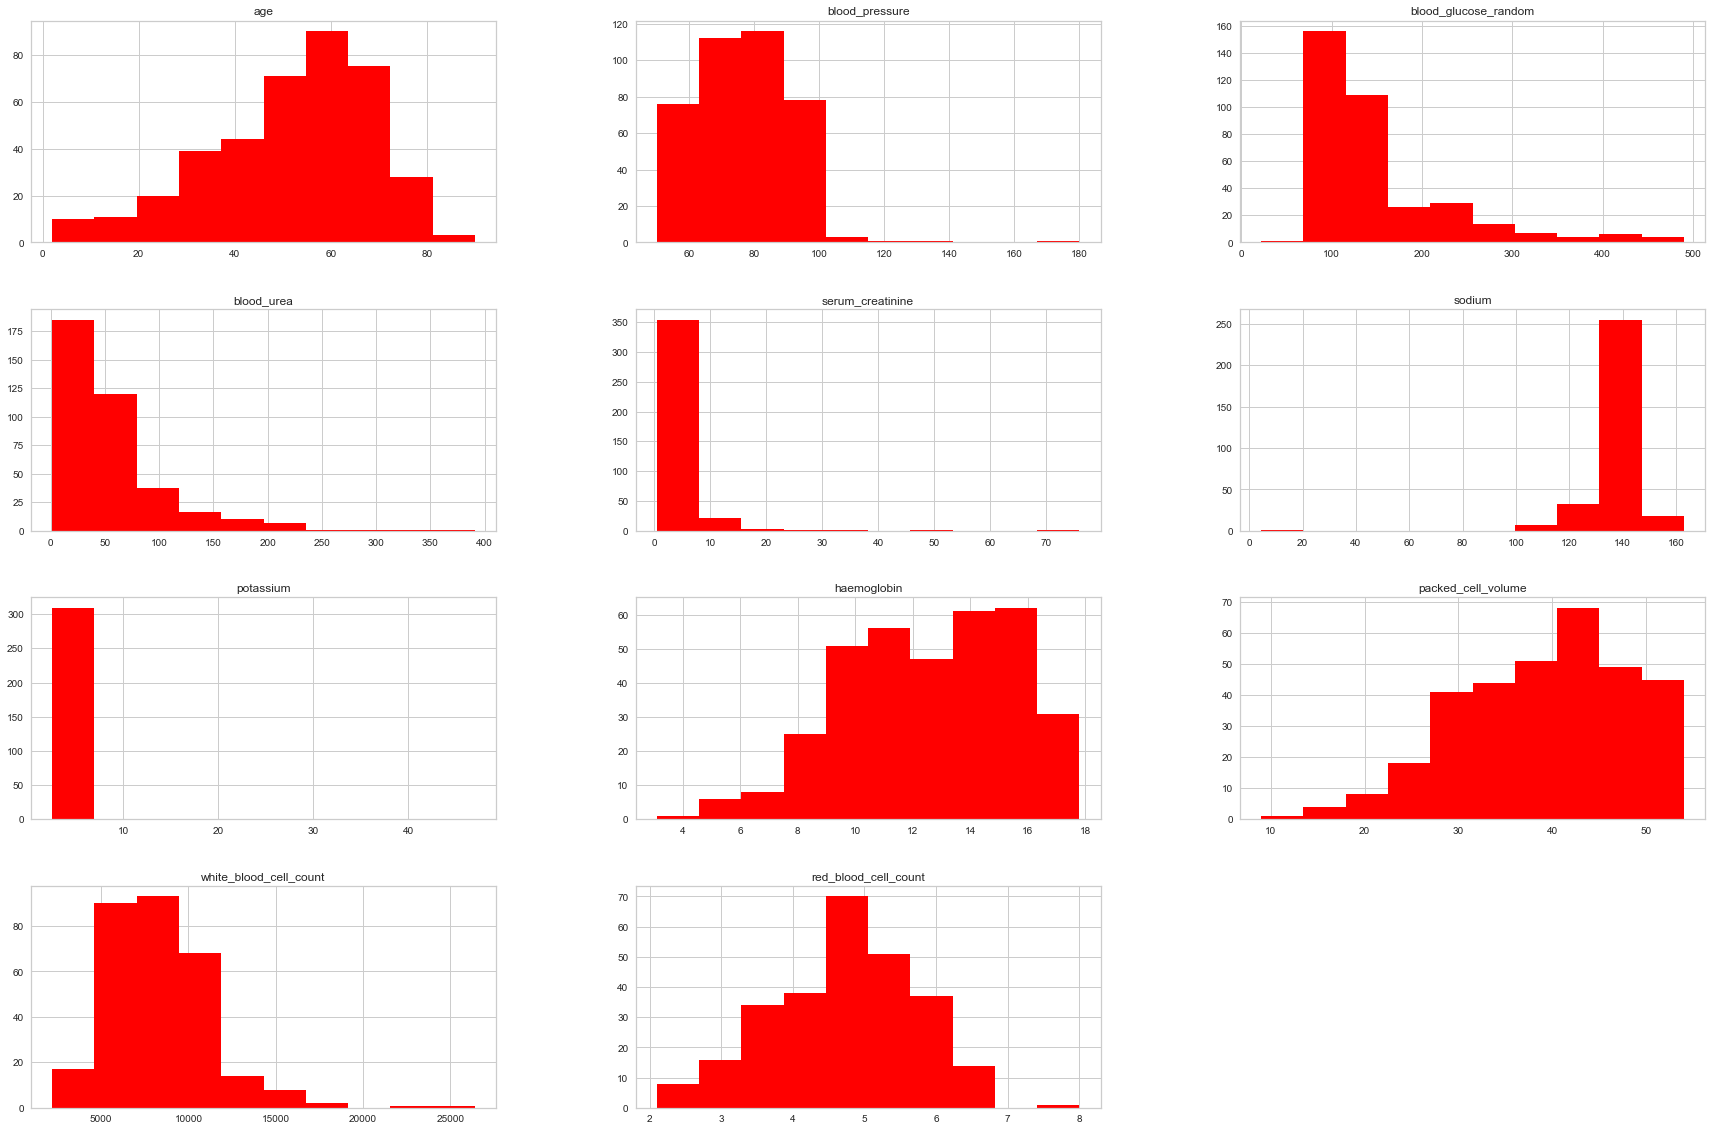

In [163]:
num.hist(figsize=(30,20),color='red')
plt.show()

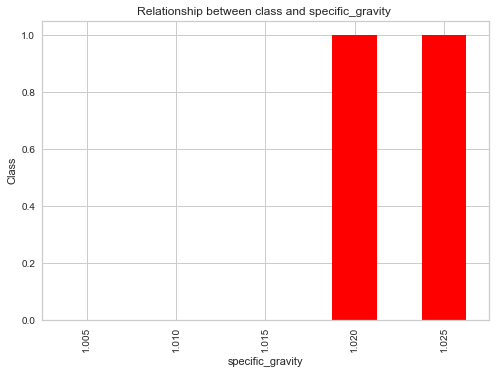

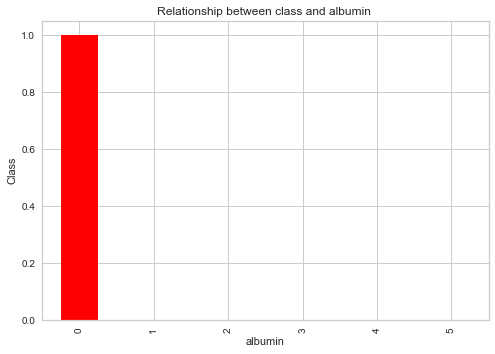

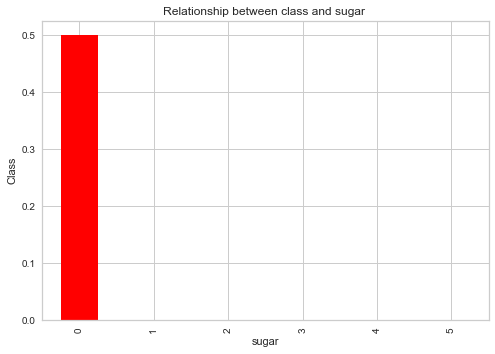

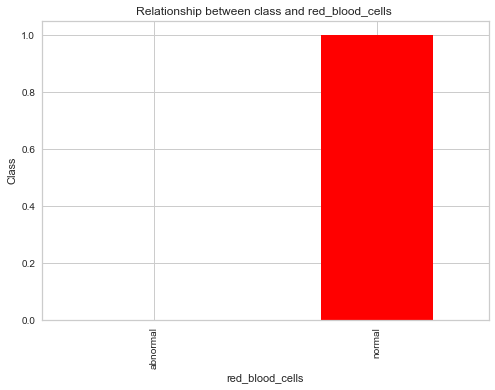

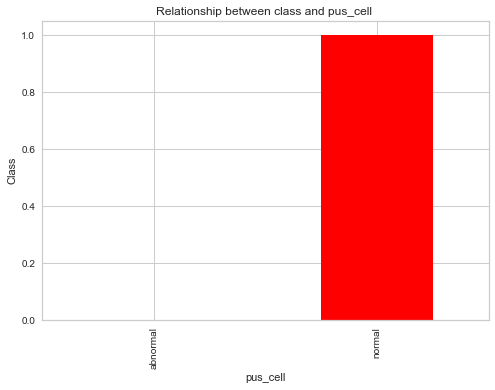

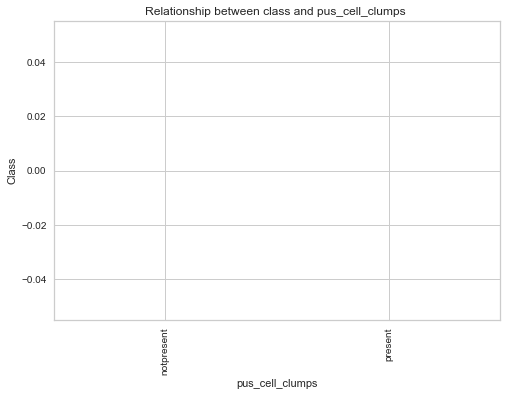

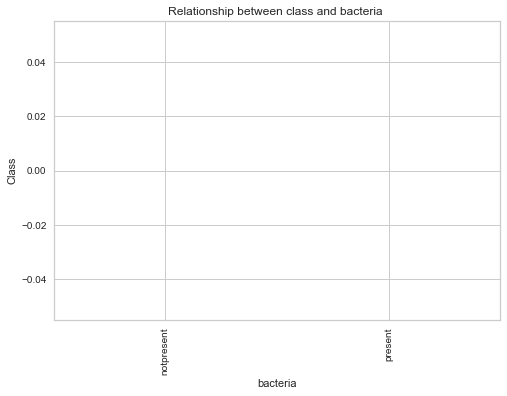

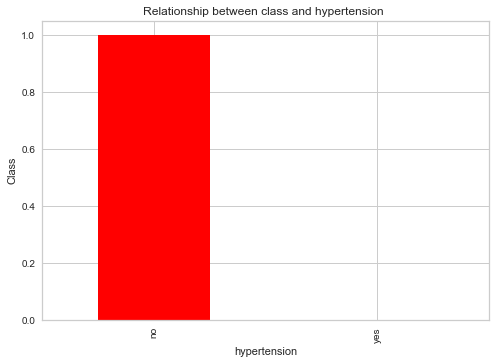

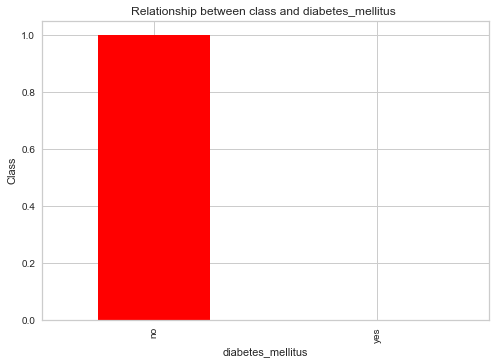

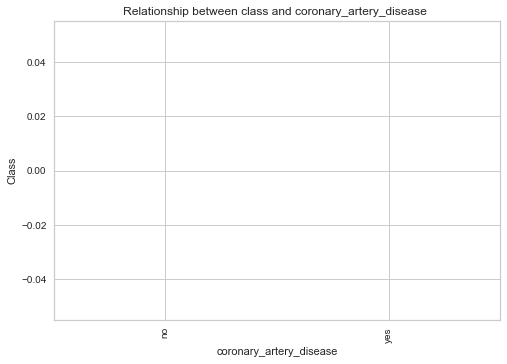

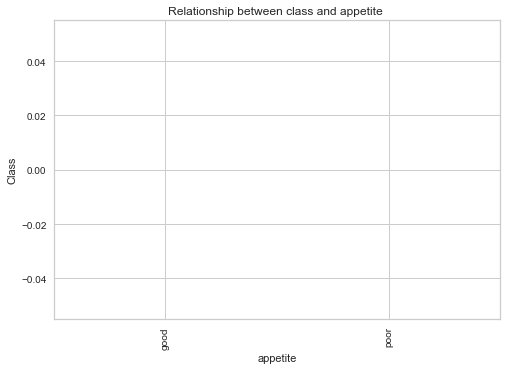

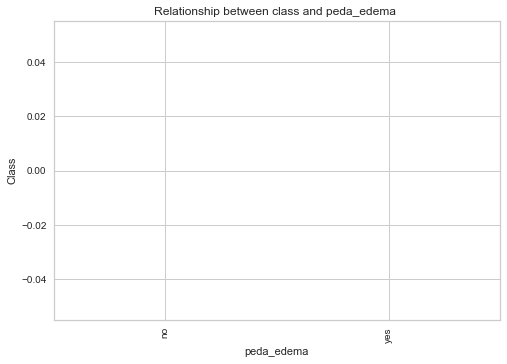

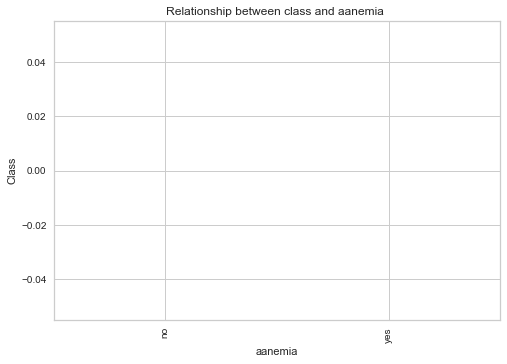

In [164]:
for i in obj:
    df.groupby(i)['class'].median().plot.bar(color="red")
    plt.xlabel(i)
    plt.ylabel('Class')
    plt.title(f"Relationship between class and {i} ")
    plt.show()

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rouka\anaconda3\lib\si

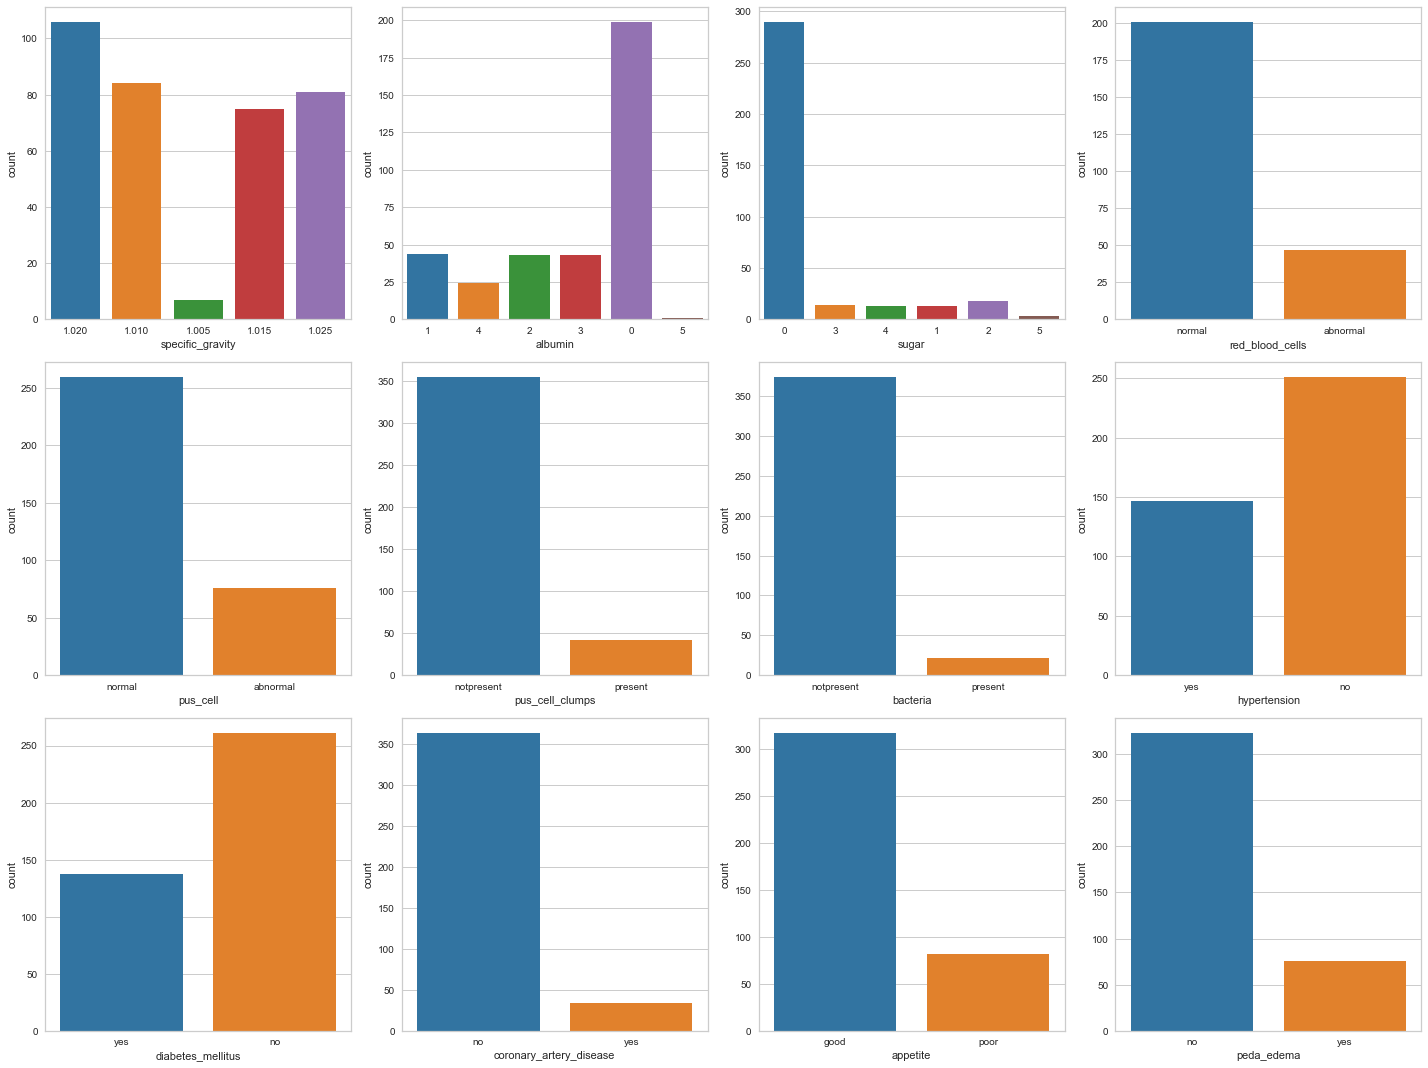

In [165]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in obj:
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'tab10')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<AxesSubplot:>

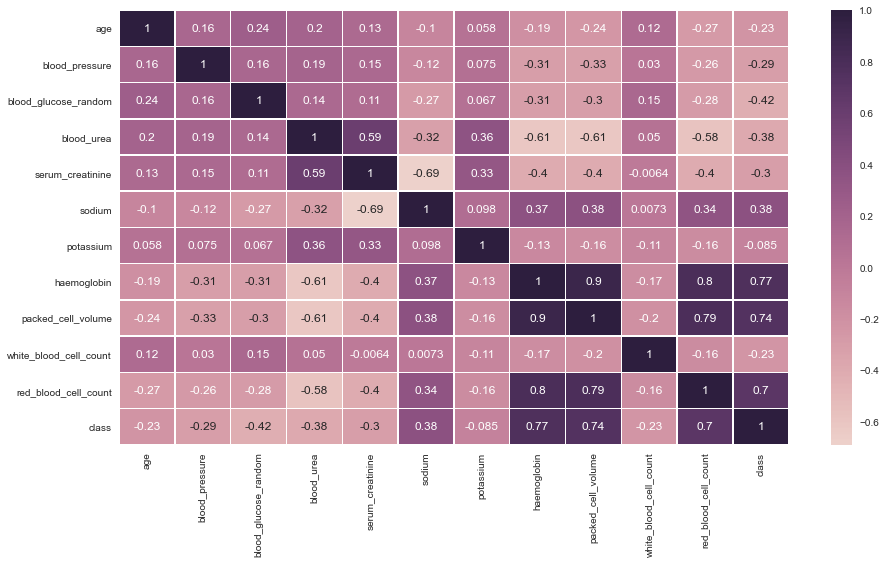

In [166]:
fig, ax = plt.subplots(figsize=(15,8))        
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))

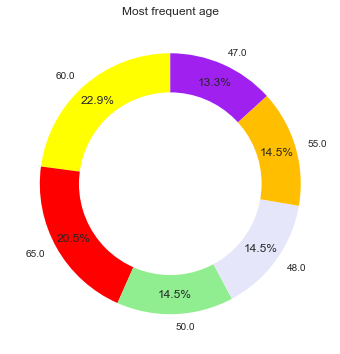

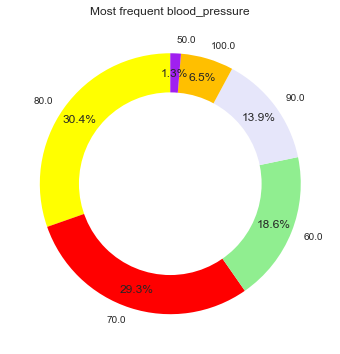

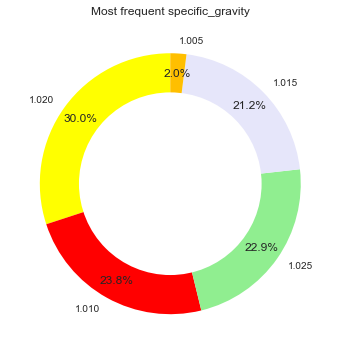

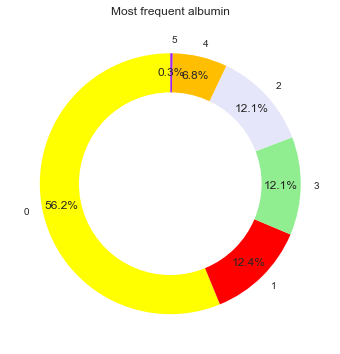

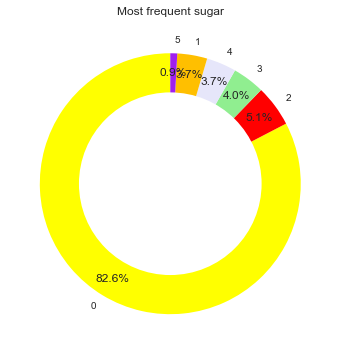

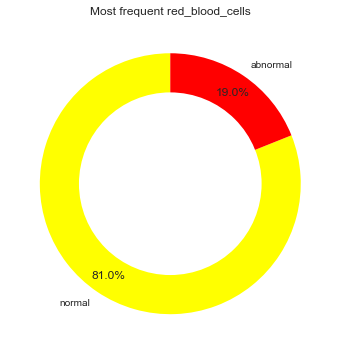

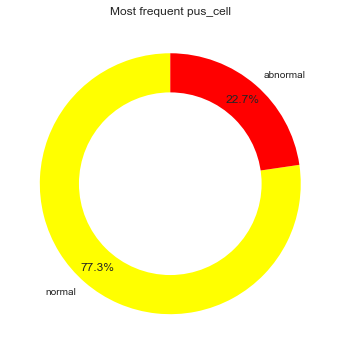

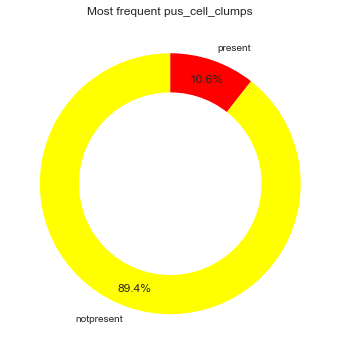

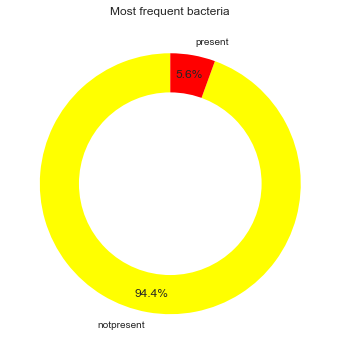

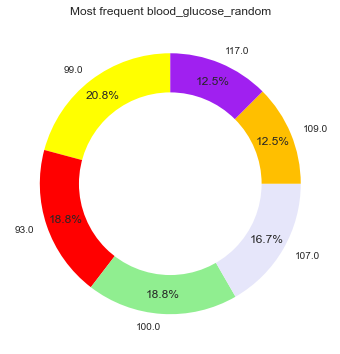

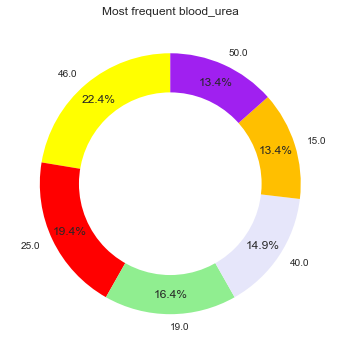

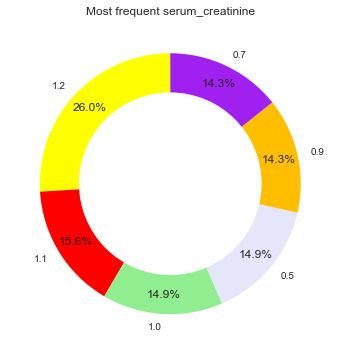

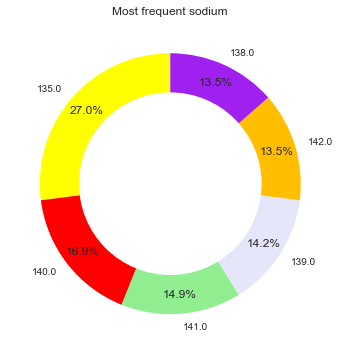

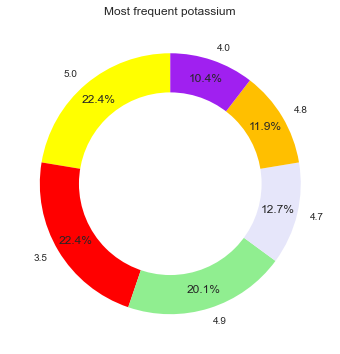

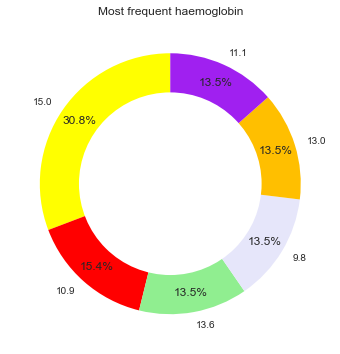

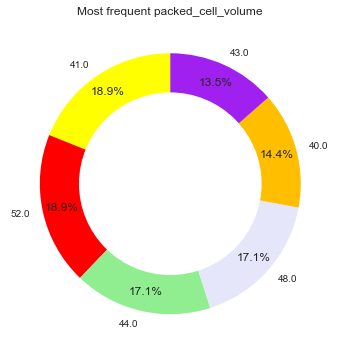

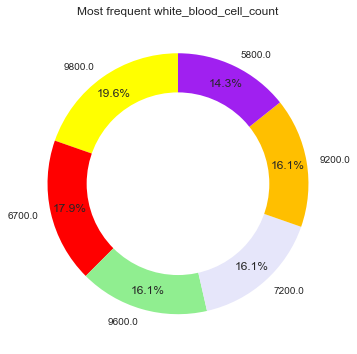

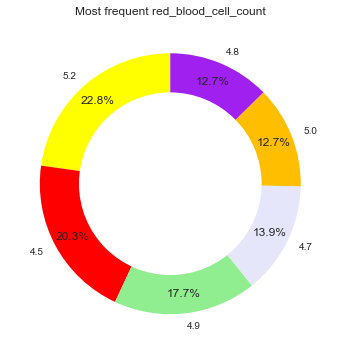

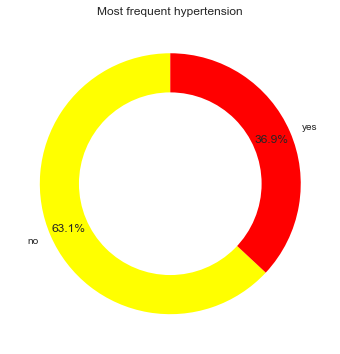

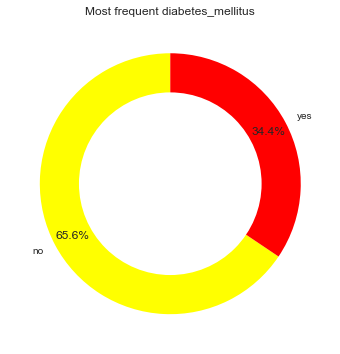

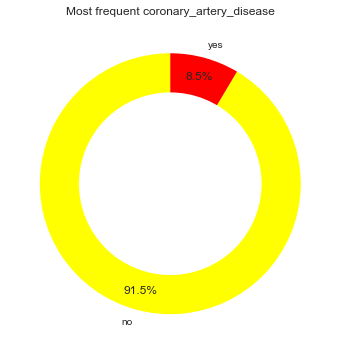

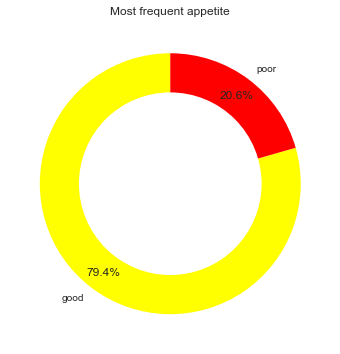

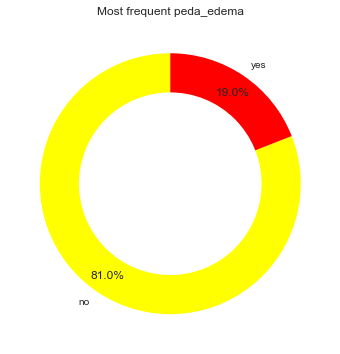

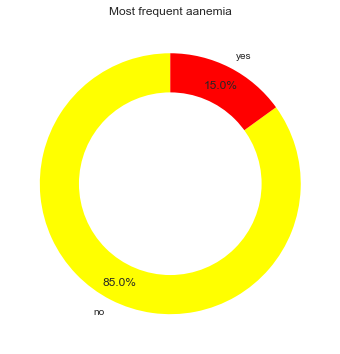

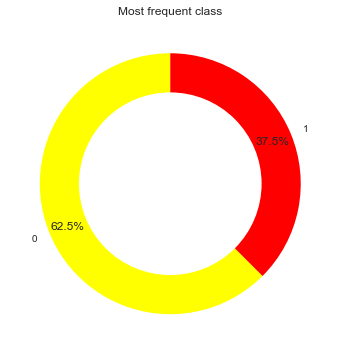

In [167]:
colors = ['#FFFF00','#FF0000','#90EE90','#E6E6FA','#FFBF00','#A020F0']
for i in df:



    ages = df[i].value_counts().index
    values = df[i].value_counts().values
    plt.pie(values[:6],labels=ages[:6],colors = colors,autopct='%1.1f%%', startangle=90, pctdistance=0.85)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.set_size_inches(8,6)
    plt.title(f"Most frequent {i}")
    plt.show()

In [168]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

Text(0.5, 1.0, 'Quantifying missing data')

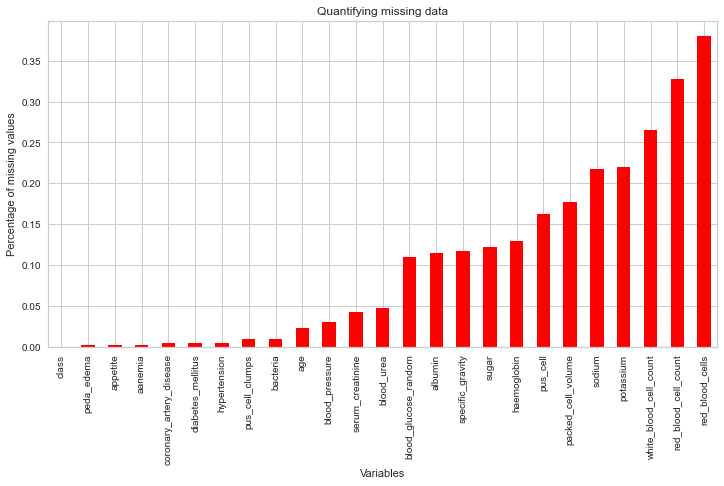

In [169]:
df.isnull().mean().sort_values().plot.bar(figsize=(12,6),color='red')
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [170]:
print('Categorical Features Unique Values')
print('___________________________________')
print()
for i in obj:
    
    print(f'{i} has = {df[i].nunique()}  unique values => {df[i].unique()} with => {len(df[df[i].isna()])} missing value')

Categorical Features Unique Values
___________________________________

specific_gravity has = 5  unique values => ['1.020' '1.010' '1.005' '1.015' nan '1.025'] with => 47 missing value
albumin has = 6  unique values => ['1' '4' '2' '3' '0' nan '5'] with => 46 missing value
sugar has = 6  unique values => ['0' '3' '4' '1' nan '2' '5'] with => 49 missing value
red_blood_cells has = 2  unique values => [nan 'normal' 'abnormal'] with => 152 missing value
pus_cell has = 2  unique values => ['normal' 'abnormal' nan] with => 65 missing value
pus_cell_clumps has = 2  unique values => ['notpresent' 'present' nan] with => 4 missing value
bacteria has = 2  unique values => ['notpresent' 'present' nan] with => 4 missing value
hypertension has = 2  unique values => ['yes' 'no' nan] with => 2 missing value
diabetes_mellitus has = 2  unique values => ['yes' 'no' nan] with => 2 missing value
coronary_artery_disease has = 2  unique values => ['no' 'yes' nan] with => 2 missing value
appetite has = 2  u

In [171]:
print('Continous Features missing values')
print('___________________________________')
print()
for i in num.drop('age',axis=1):
    
    print(f'{i} has => {df[i].isna().sum()} missing value')

Continous Features missing values
___________________________________

blood_pressure has => 12 missing value
blood_glucose_random has => 44 missing value
blood_urea has => 19 missing value
serum_creatinine has => 17 missing value
sodium has => 87 missing value
potassium has => 88 missing value
haemoglobin has => 52 missing value
packed_cell_volume has => 71 missing value
white_blood_cell_count has => 106 missing value
red_blood_cell_count has => 131 missing value


In [172]:
#df['age'].fillna(df['age'].mode(),inplace=True)
print(f'Numerical Features = {num.columns}')

print(f'Categorical Features = {obj.columns}')

Numerical Features = Index(['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea',
       'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'],
      dtype='object')
Categorical Features = Index(['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
       'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia'],
      dtype='object')


In [173]:
for i in num.drop('age',axis=1):
    print(f' mean of {i} = {num[i].mean()}')

 mean of blood_pressure = 76.46907216494846
 mean of blood_glucose_random = 148.0365168539326
 mean of blood_urea = 57.425721784776904
 mean of serum_creatinine = 3.0724543080939934
 mean of sodium = 137.52875399361022
 mean of potassium = 4.627243589743592
 mean of haemoglobin = 12.526436781609195
 mean of packed_cell_volume = 38.88449848024316
 mean of white_blood_cell_count = 8406.122448979591
 mean of red_blood_cell_count = 4.707434944237919


In [174]:
from statistics import mode
for i in obj:
    print(f'mode of {i} = {mode(obj[i])}')

mode of specific_gravity = 1.020
mode of albumin = 0
mode of sugar = 0
mode of red_blood_cells = normal
mode of pus_cell = normal
mode of pus_cell_clumps = notpresent
mode of bacteria = notpresent
mode of hypertension = no
mode of diabetes_mellitus = no
mode of coronary_artery_disease = no
mode of appetite = good
mode of peda_edema = no
mode of aanemia = no


In [175]:
df['age'] = df['age'].fillna(mode(df['age']))

In [176]:
for i in num.drop('age',axis=1):
    df[i] = df[i].fillna(df[i].mean())

In [177]:
for i in obj:
    df[i] = df[i].fillna(mode(df[i]))

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

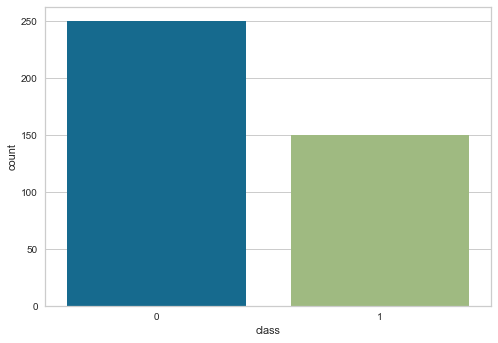

In [178]:
sns.countplot(df['class'])

In [179]:
for i in obj:
    if df[i].nunique() == 2:
        print(f'{i} has only {df[i].nunique()}')
        df[i]= label_encoder.fit_transform(df[i])
        print(f'{i} now has {df[i].unique()}')

red_blood_cells has only 2
red_blood_cells now has [1 0]
pus_cell has only 2
pus_cell now has [1 0]
pus_cell_clumps has only 2
pus_cell_clumps now has [0 1]
bacteria has only 2
bacteria now has [0 1]
hypertension has only 2
hypertension now has [1 0]
diabetes_mellitus has only 2
diabetes_mellitus now has [1 0]
coronary_artery_disease has only 2
coronary_artery_disease now has [0 1]
appetite has only 2
appetite now has [0 1]
peda_edema has only 2
peda_edema now has [0 1]
aanemia has only 2
aanemia now has [0 1]


In [180]:
for i in obj:
    if df[i].nunique()!=2:
        print(f'{i} has {df[i].unique()}')

specific_gravity has ['1.020' '1.010' '1.005' '1.015' '1.025']
albumin has ['1' '4' '2' '3' '0' '5']
sugar has ['0' '3' '4' '1' '2' '5']


In [181]:
df['specific_gravity'] = df['specific_gravity'].astype('float64')

In [182]:
df['albumin'] = df['albumin'].astype('int32')
df['sugar'] = df['sugar'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    int32  
 4   sugar                    400 non-null    int32  
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

 skewness of blood_pressure = 1.6237575531596693


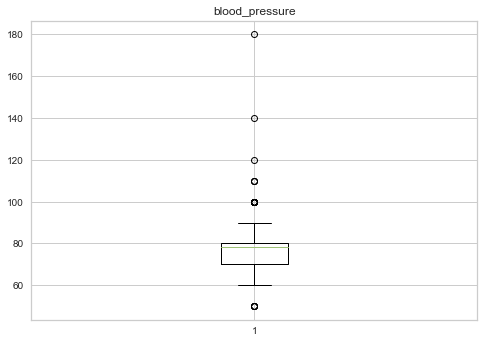

 skewness of blood_glucose_random = 2.1224240857825074


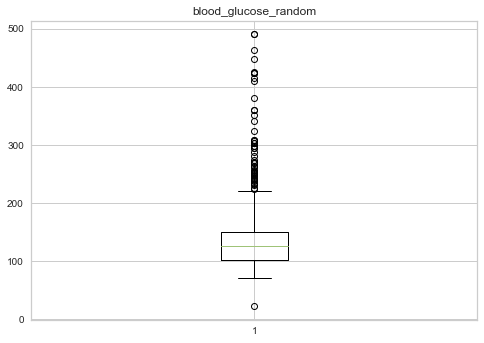

 skewness of blood_urea = 2.6886231806774763


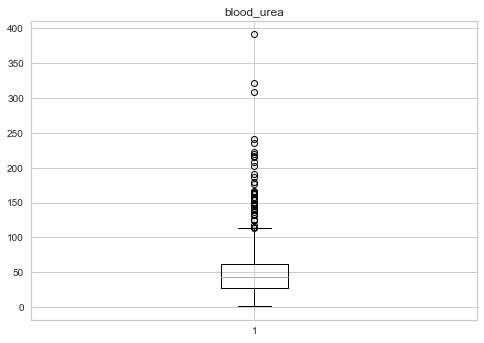

 skewness of serum_creatinine = 7.6443004785698125


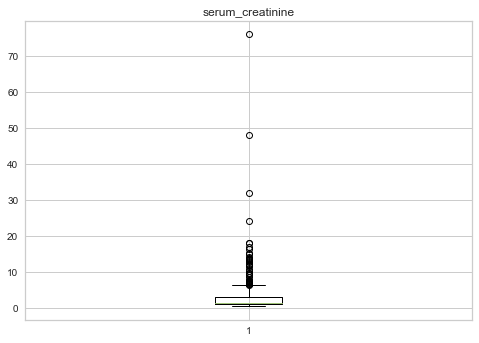

 skewness of sodium = -7.87143374665551


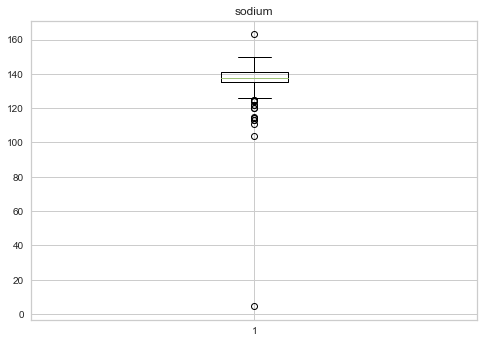

 skewness of potassium = 13.051976739270389


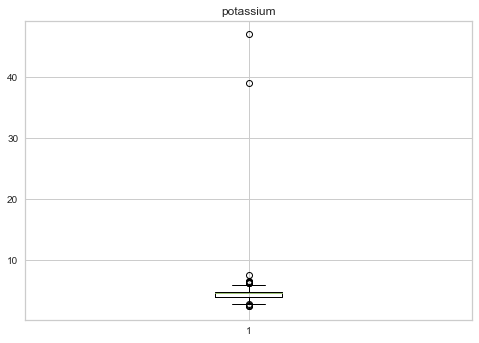

 skewness of haemoglobin = -0.3577088170020545


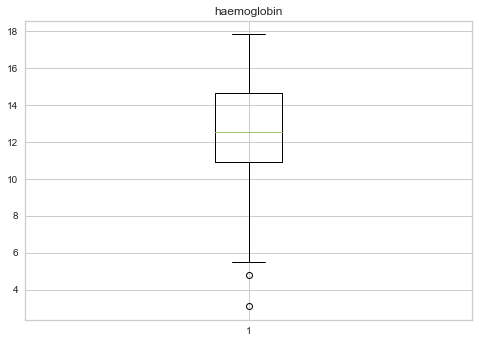

 skewness of packed_cell_volume = -0.4760065384416023


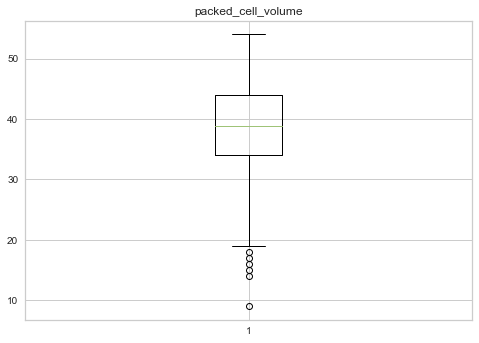

 skewness of white_blood_cell_count = 1.8817962372378698


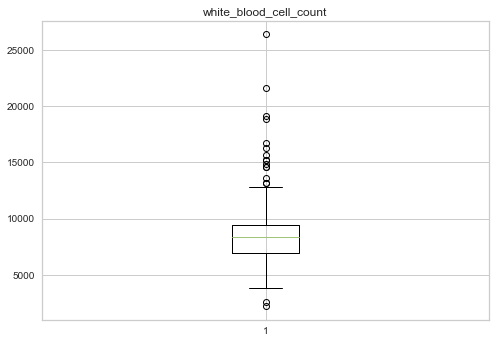

 skewness of red_blood_cell_count = -0.22230719010677968


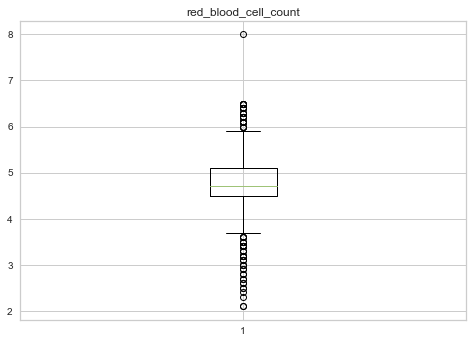

In [183]:
from scipy.stats import skew
for i in num.drop('age', axis=1):
    print(f' skewness of {i} = {skew(df[i])}')
    plt.boxplot(df[i])
    plt.title(i)
    skew(df[i])
    plt.show()